In [4]:
# !wget -O ChurnData.csv https://drive.google.com/open?id=15KfgmmjAk_l9qBTG4LIL5NWH75vr6NvQ
# df = pd.read_csv('https://drive.google.com/open?id=1yQe_ThQKVYGkEEhQF6g-v8RlOA_ej-j2')
# df = pd.read_csv('Churn.csv')
# df.head()

In [5]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_22243ef902d94ad89c6563551934d043 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ptvye7cRW6Glgv6AGOkzs12jo1Rnpad2wLwjBxW9VPDC',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_22243ef902d94ad89c6563551934d043.get_object(Bucket='labcourse-donotdelete-pr-7nq5b1mvuy8kcw',Key='WA_Fn-UseC_-Telco-Customer-Churn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df


ModuleNotFoundError: No module named 'botocore'

In [ ]:
#libraries
import numpy as np         # linear algebra
import pandas as pd       # data processing

In [ ]:
df = df.iloc[:3000,:]
df

# Dataset Overveiw

In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])

In [ ]:
print ("\nVariables : \n" ,df.columns.tolist())

In [ ]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())

In [ ]:
print ("\nUnique values :  \n",df.nunique())

In [ ]:
df.dtypes

In [ ]:
df.info()

## Data Manipulation

In [ ]:
#Dropping null values from total charges column which contain .15% missing data 
#df = df[df["TotalCharges"].notnull()]
#df = df.reset_index()[df.columns]

In [ ]:
df = df.replace({"Male":1,"Female":0,"Yes":1,"No":0,"No phone service":0,"No internet service":0})
df

In [ ]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan).astype(float)
df['InternetService'] = df['InternetService'].replace({"DSL":1,"Fiber optic":2,"No":0})
df['Contract'] = df['Contract'].replace({"Month-to-month":0,"One year":1,"Two year":2})

In [ ]:
#df.dropna(subset=["columnname"], axis=0)

In [ ]:
#df.dropna(subset=["columnname"], axis=0)

del df['customerID']

del df['PaymentMethod']

In [ ]:
# def tenure_lab(telcom) :
    
#     if telcom["tenure"] <= 12 :
#         return 0
#     elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
#         return 1
#     elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
#         return 2
#     elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
#         return 3
#     elif telcom["tenure"] > 60 :
#         return 4
# df["Tenure_group"] = df.apply(lambda df:tenure_lab(df),
#                                       axis = 1)

In [ ]:
df.count()

In [ ]:
avg_norm_TotalCharges = df["TotalCharges"].astype("float").mean(axis=0)
print("Average of normalized-TotalCharges:",avg_norm_TotalCharges)

In [ ]:
df["TotalCharges"].replace(np.nan, avg_norm_TotalCharges, inplace=True)

In [ ]:
df.count()

In [ ]:
df = df.astype(float)

In [ ]:
df.info()

## Exploratory Data Analysis

In [ ]:
df.corr()

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure 
from matplotlib import pyplot as plt
plt.figure(figsize=(6,8), dpi= 80, facecolor='w', edgecolor='k')
sns.countplot(x='Churn',data=df, palette='hls')
plt.show()

In [3]:
from matplotlib.pyplot import figure
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(),annot = True,cmap='Blues')  
plt.savefig('heatmap.png')
plt.show()

NameError: name 'plt' is not defined

In [152]:
from sklearn.ensemble import ExtraTreesClassifier

X = df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']] #ind col
y = df['Churn']   #targt 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

feat_importances = pd.Series(model.feature_importances_, index=X.columns)


[0.04 0.03 0.03 0.02 0.13 0.01 0.03 0.06 0.03 0.03 0.03 0.04 0.03 0.03
 0.12 0.03 0.16 0.16]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


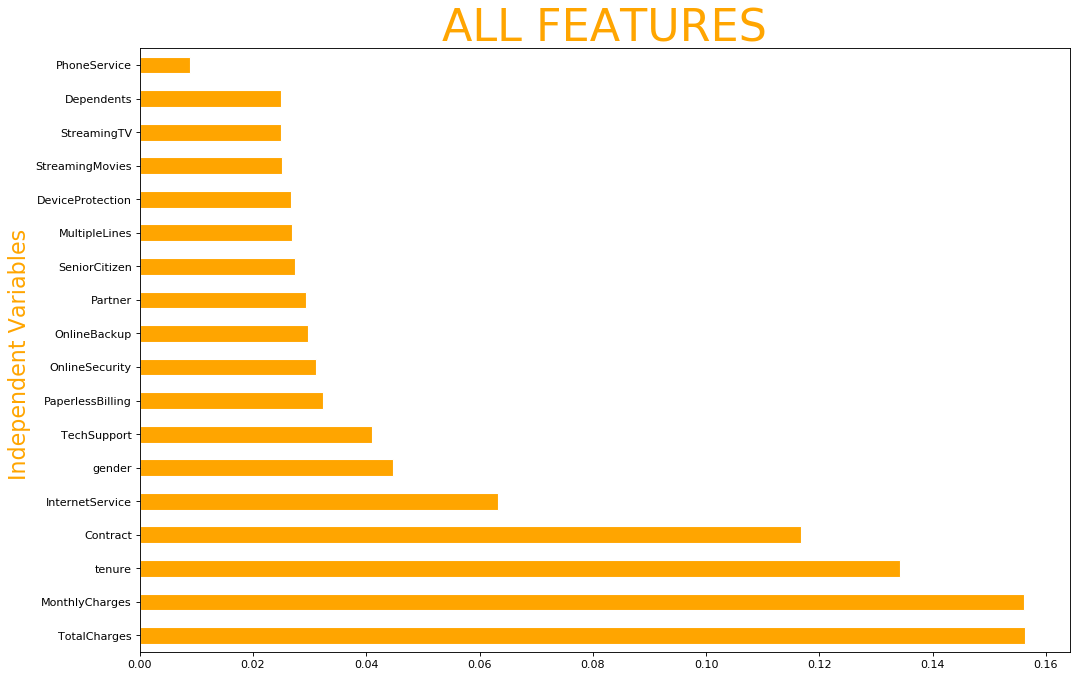

In [153]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
feat_importances.nlargest(20).plot(kind='barh',edgecolor='w',color='orange')
plt.ylabel('Independent Variables ',size=20,color='orange')
plt.title('ALL FEATURES',size=40,color='orange')
plt.show()
#plt.savefig('heap.png')

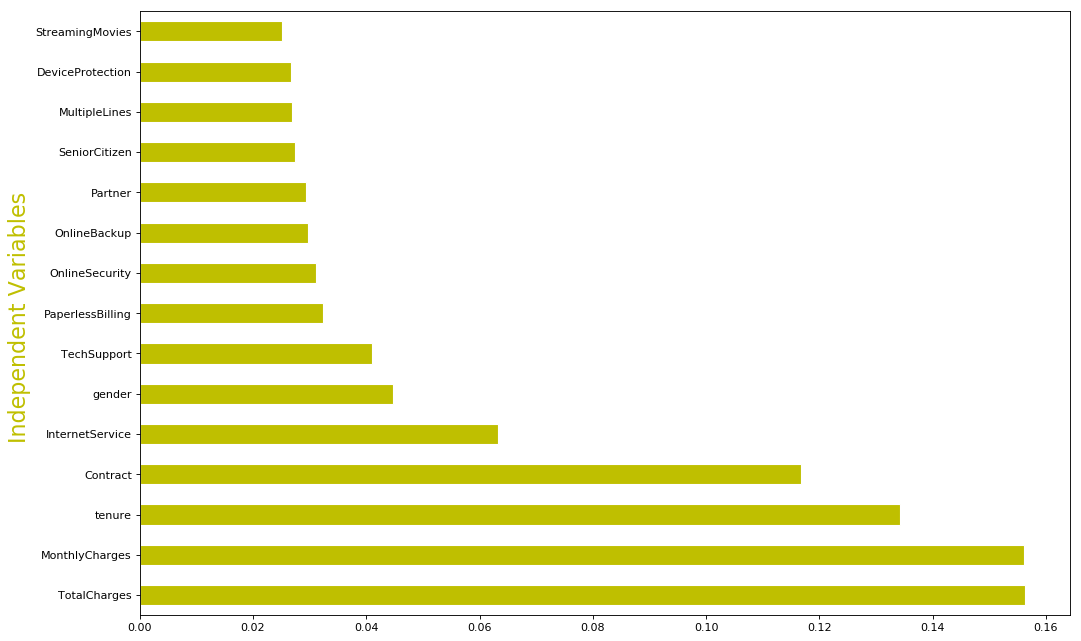

In [154]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
feat_importances.nlargest(15).plot(kind='barh',edgecolor='w',color='y')
plt.ylabel('Independent Variables ',size=20,color='y')
plt.show()
#plt.savefig('heap.png')


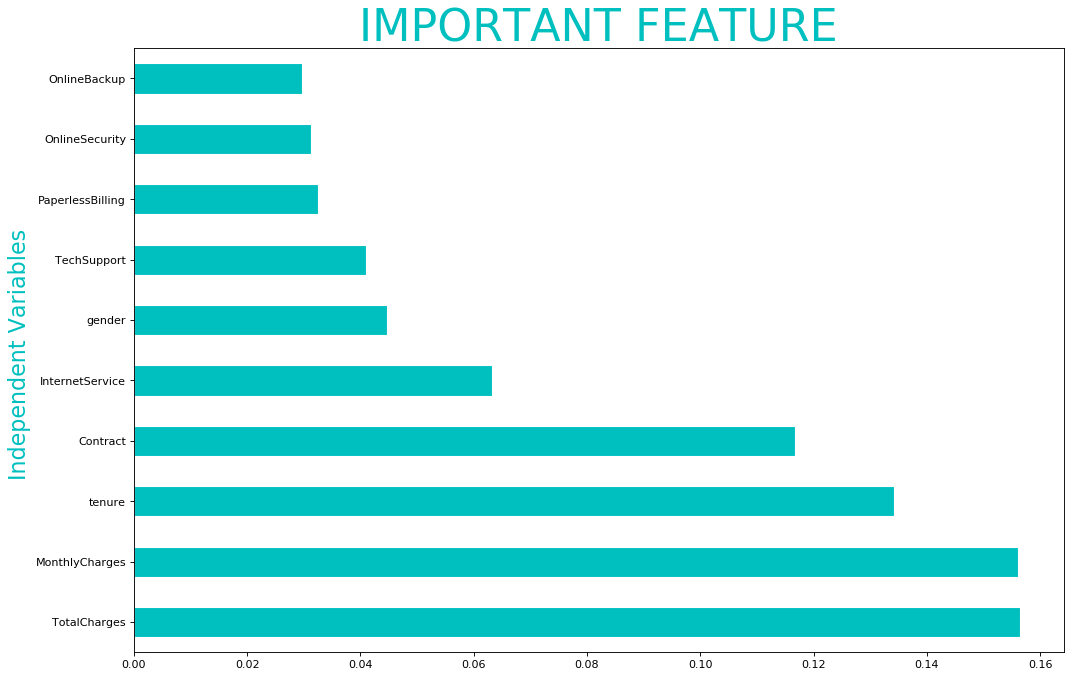

In [155]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
feat_importances.nlargest(10).plot(kind='barh',edgecolor='w',color='c')
plt.ylabel('Independent Variables ',size=20,color='c')
plt.title("IMPORTANT FEATURE",size=40,color='c')
plt.show()
#plt.savefig('heap.png')

# Train / Test Split  

In [156]:
X1 = df[['OnlineSecurity','Partner','PaperlessBilling','TechSupport','gender','Contract','InternetService','MonthlyCharges','TotalCharges','tenure']]
Y1 = df['Churn']

In [157]:
df1 = df[['Churn','OnlineSecurity','Partner','PaperlessBilling','TechSupport','gender','Contract','InternetService','MonthlyCharges','TotalCharges','tenure']]


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X1, Y1, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (2400, 10) (2400,)
Test set: (600, 10) (600,)


<Figure size 1200x800 with 0 Axes>

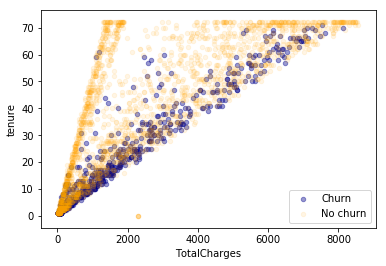

In [159]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
ax = df[df['Churn'] == 1][:].plot\
(kind='scatter', x='TotalCharges', y='tenure', color='DarkBlue', label='Churn',alpha=0.4)

df[df['Churn'] == 0][:].plot\
(kind='scatter', x='TotalCharges', y='tenure', color='Orange', label='No churn',alpha=0.1,ax=ax)
plt.show()

<Figure size 1200x800 with 0 Axes>

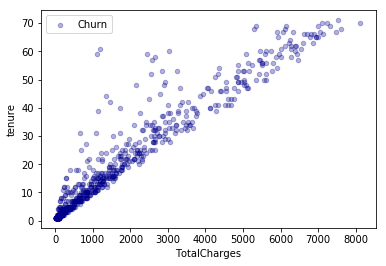

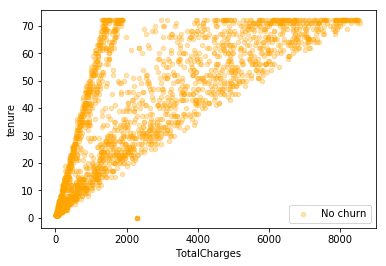

In [160]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
ax = df[df['Churn'] == 1][:].plot\
(kind='scatter', x='TotalCharges', y='tenure', color='DarkBlue', label='Churn',alpha=0.3)

df[df['Churn'] == 0][:].plot\
(kind='scatter', x='TotalCharges', y='tenure', color='Orange', label='No churn',alpha=0.3)
plt.show()

<Figure size 1200x800 with 0 Axes>

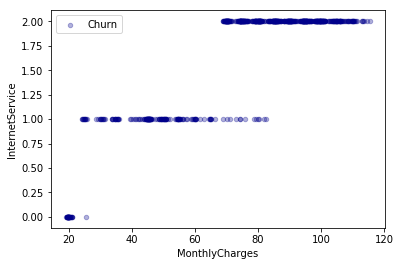

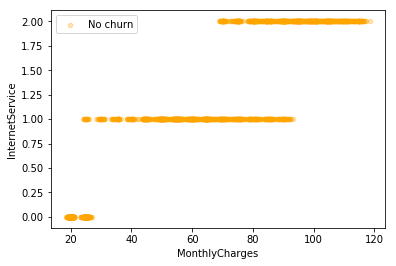

In [161]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
ax = df[df['Churn'] == 1][:].plot\
(kind='scatter', x='MonthlyCharges', y='InternetService', color='DarkBlue', label='Churn',alpha=0.3)

df[df['Churn'] == 0][:].plot\
(kind='scatter', x='MonthlyCharges', y='InternetService', color='Orange', label='No churn',alpha=0.3)
plt.show()

<Figure size 1200x800 with 0 Axes>

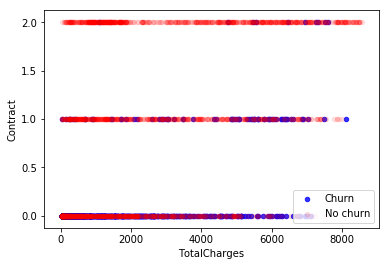

In [162]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
ax = df[df['Churn'] == 1][:].plot\
(kind='scatter', x='TotalCharges', y='Contract', color='b', label='Churn',alpha=0.8)

df[df['Churn'] == 0][:].plot\
(kind='scatter', x='TotalCharges', y='Contract', color='r', label='No churn',alpha=0.1,ax=ax)
plt.show()

<Figure size 1200x800 with 0 Axes>

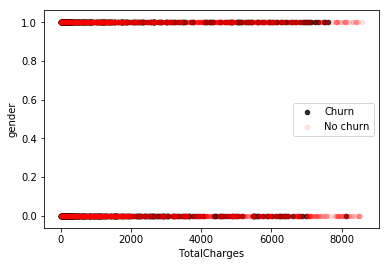

In [163]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
ax = df[df['Churn'] == 1][:].plot\
(kind='scatter', x='TotalCharges', y='gender', color='k', label='Churn',alpha=0.8)

df[df['Churn'] == 0][:].plot\
(kind='scatter', x='TotalCharges', y='gender', color='r', label='No churn',alpha=0.1,ax=ax)
plt.show()

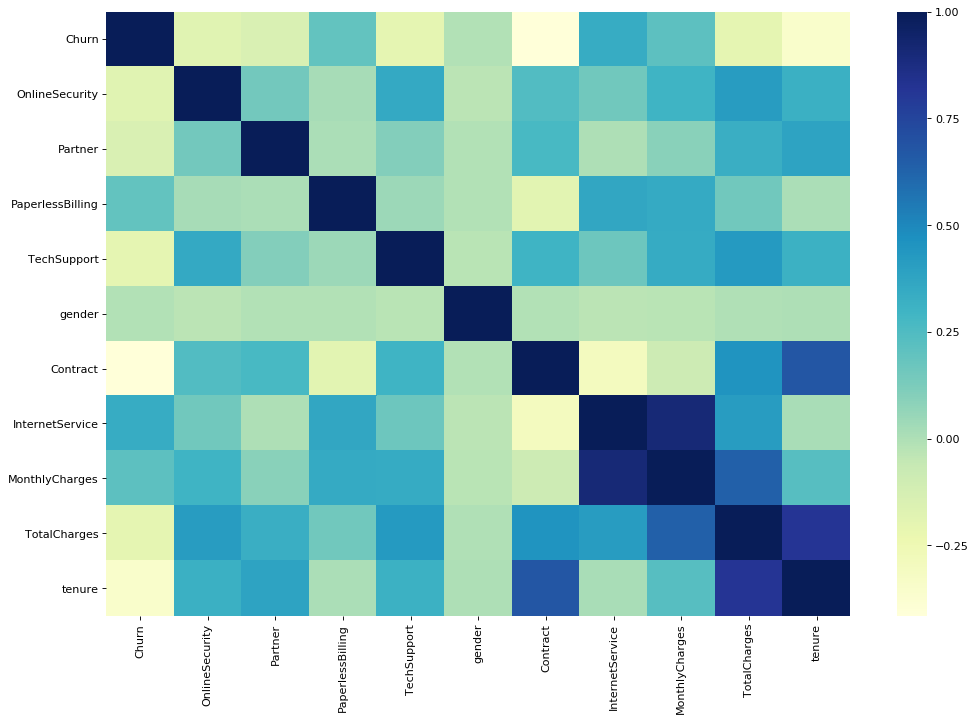

In [164]:
from matplotlib.pyplot import figure
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(df1.corr(),cmap='YlGnBu')  
#plt.savefig('heatmap.png')
plt.show()

# Training

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train) #
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# Testing

In [166]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0.

In [167]:
X_test.head()

,OnlineSecurity,Partner,PaperlessBilling,TechSupport,gender,Contract,InternetService,MonthlyCharges,TotalCharges,tenure
1801,0.0,0.0,1.0,0.0,1.0,0.0,2.0,69.70,1490.40,22.0
1190,1.0,0.0,1.0,0.0,1.0,1.0,2.0,104.85,3887.25,38.0
1817,0.0,1.0,0.0,0.0,1.0,2.0,2.0,98.35,6929.40,72.0
251,0.0,1.0,0.0,0.0,0.0,0.0,2.0,70.40,147.15,2.0
2505,0.0,1.0,1.0,0.0,0.0,1.0,0.0,20.10,682.10,34.0


In [168]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.58, 0.42],
       [0.71, 0.29],
       [0.93, 0.07],
       [0.36, 0.64],
       [0.96, 0.04]])

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


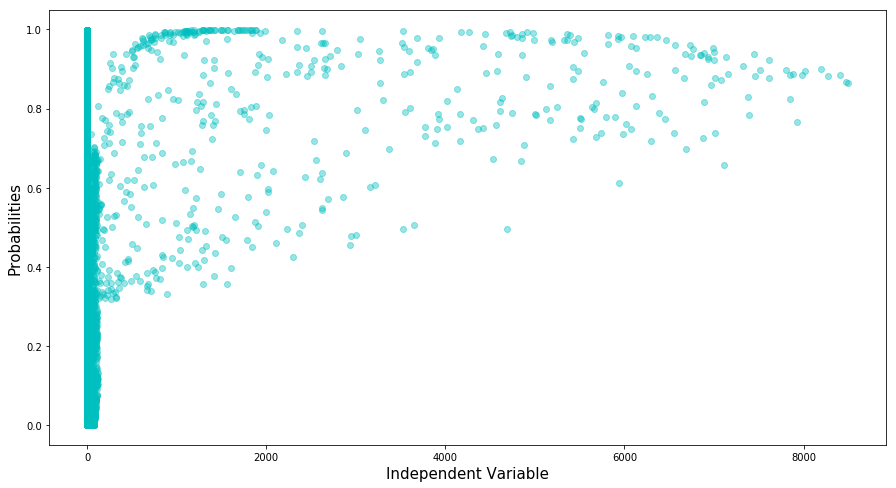

In [169]:
plt.figure(figsize=(15,8))
plt.plot(X_test, yhat_prob, 'co',alpha=0.4)
plt.ylabel('Probabilities',size=15)
plt.xlabel('Independent Variable',size=15)
plt.show()

# Evaluation
Model performance

In [170]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, yhat) #Actual, Predicted

0.805

### Confusion Matrix

In [171]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, yhat, labels=[1,0]))

[[ 78  68]
 [ 49 405]]


Confusion matrix, without normalization
[[ 78  68]
 [ 49 405]]


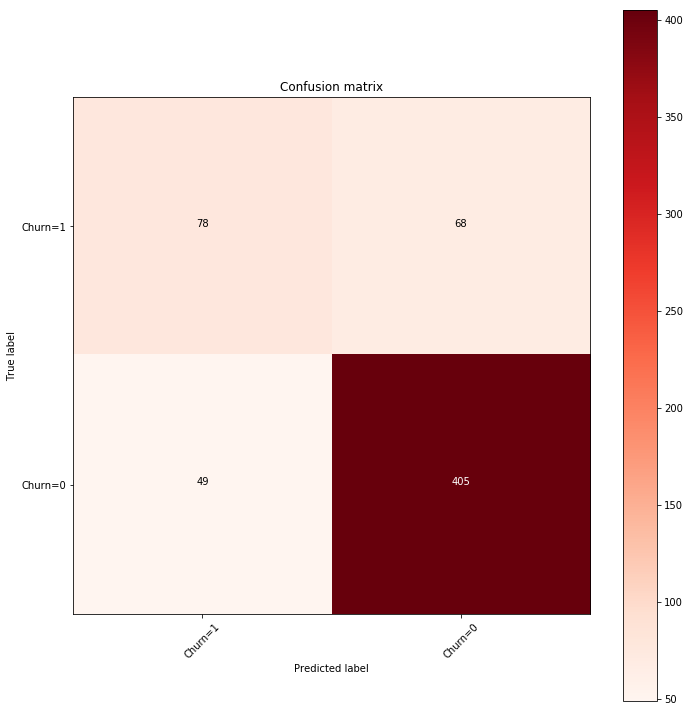

In [172]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=['Churn=1','Churn=0'],normalize= False,  title='Confusion matrix',cmap='Reds')

Look at first row.

The firsr row is for customers whose actual churn value in test set is 1.

As you can calculate, out of 600 customers, the churn value of 146 of them is 1. And out of these 146, the classifier correctly predicted 78 of them as 1, and 68 of them as 0.

It means, for 78 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. 

However, while the actual label of 68 customers were 1, the classifier predicted those as 0, which is not very good.

We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row. It looks like there were 454 customers whom their churn value were 0.

The classifier correctly predicted 405 of them as 0, and 49 of them wrongly as 1.

So, it has done a good job in predicting the customers with churn value 0. 

A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.




In [173]:
from sklearn.metrics import accuracy_score
print("Accuracy Score = ",  accuracy_score(Y_test,yhat))

Accuracy Score =  0.805


In [174]:
print (classification_report(Y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       454
         1.0       0.61      0.53      0.57       146

   micro avg       0.81      0.81      0.81       600
   macro avg       0.74      0.71      0.72       600
weighted avg       0.80      0.81      0.80       600



## Log loss

Now, lets try log loss for evaluation. 

In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). 

This probability is a value between 0 and 1.

Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [175]:
from sklearn.metrics import log_loss
log_loss(Y_test, yhat_prob)

0.41412159291096867